# Tournois Binomiaux

In [288]:
import graphviz as gv
import math as m
import os as file

class TournoiBinomial:
    def __init__(self,k):
        self.pere = None # TournoiBinomial
        self.fils = FileBinomial() # FileBinomial comporant k fils
        self.pred = None # TournoiBinomial frere gauche
        self.succ = None # TournoiBinomial frere droit
        self.cle = k # clé de TournoiBinomial
        self.degre = 0 # degré de TournoiBinomial
        
    def EstRacine(T):
        if(T.pere is None):
            return True;
        else:
            return False

    def EstVide(T):
        if (T is None):
            return True
        else:
            return False
        
    def Degre(T):
        return T.degre
    
    def Union2Tid (T1,T2):
        # TournoiB ∗ TournoiB −> TournoiB Renvoie l’union de 2 tournois de meme taille
        if(T1.cle < T2.cle):
            T1.fils.arbres.append(T2)
            T1.degre = T1.Degre() + 1
            return T1
        else:
            T2.fils.arbres.append(T1)
            T2.degre = T2.Degre() + 1
            return T2
        
    def Decapite(T):
        # TournoiB −> FileB Renvoie la file binomiale obtenue en supprimant la racine du tournoi 
        # T_k −> <T_{k−1},T_{k−2}, ... ,T_1,T_0 >
        F = FileBinomial()
        F.arbres.extend(T.fils)
        return F
    
    def File(T):
        # TournoiB −> FileB Renvoie la file binomiale reduite au tournoi
        # T_k −> <T_k >
        F = FileBinomial()
        F.arbres.append(T)
        return F
    
    def to_graph(self,G,i):
        for T in self.fils.arbres:
            # racine de T
            G.node(str(i),str(T.cle),shape='circle')
            if(i > 0):
                # double chaînage entre les fils
                if str(i-1) != str(self.cle):
                    G.edge(str(i-1),str(i), constraint='false')
                    G.edge(str(i),str(i-1), constraint='false')
                else:
                    G.edge(str(i-1),str(i))
                    G.edge(str(i),str(i-1))
                # chaînage de la racine vers les fils
                G.edge('racine'+str(self.cle), str(i))
                G.edge('racine'+str(self.cle), str(i-1))
            else:
                # racine du pere
                G.node('racine'+str(self.cle), str(self.cle), shape='circle')
            i = i + 1
            T.to_graph(G,i)
        return G
    
    # Permet d'afficher l'arbre
    def plot(self):
        G = gv.Digraph(strict=True)
        return self.to_graph(G,0)

# Files Binomiales

In [275]:
class FileBinomial:
    def __init__(self):
        self.arbres = [] # Liste de tournoi binomial
        self.size = 0 # taille du tas
        
    def EstVide(F):
        if (F is None):
            return True
        else:
            return False
        
    def MinDeg(F):
        # FileB −> TournoiB Renvoie le tournoi de degre minimal dans la file
        T = TournoiBinomial()
        for a in F.arbres:
            if(T is None):
                T = a
            else:
                if(a.Degre() < T.Degre()):
                    T = a
        return T
    
    def Reste(F):
        # FileB −> FileB Renvoie la file privee de son tournoi de degre minimal
        F.arbres.remove(MinDeg(F))
        return F
    
    def AjoutMin(T, F):
        # Hypothese : le tournoi est de degre inferieur au MinDeg de la file
        # Tournoi ∗ FileB −> FileB
        # Renvoie la file obtenue en ajoutant le tournoi comme tournoi de degre minimal de la file initiale
        x = [T]
        x.extend(F.arbres)
        return x 
    
    def UnionFile (F1 , F2):
        # FileB ∗ FileB −> FileB, Renvoie la file binomiale union des deux files F1 et F2
        return UFret(F1 , F2 , None)
    
    def UFret(F1 , F2 , T):
        # FileB ∗ FileB ∗ TournoiB−> FileB, Renvoie la file binomiale union de deux files et d’un tournoi
        if EstVide(T): # pas de tournoi en retenue
            if EstVide(F1):
                return F2
            if EstVide(F2):
                return F1
            T1 = MinDeg(F1)
            T2 = MinDeg(F2)
            if Degre(T1) < Degre(T2):
                return AjoutMin(T1 , UnionFile (Reste(F1), F2))
            if Degre(T2) < Degre(T1):
                return AjoutMin(T2 , UnionFile (Reste(F2), F1))
            if Degre(T1) == Degre(T2):
                return UFret(Reste(F1), Reste(F2), Union2Tid (T1 ,T2))
        else: # T tournoi en retenue
            if EstVide(F1):
                return UnionFile (File(T), F2)
            if EstVide(F2):
                return UnionFile (File(T), F1)
            T1 = MinDeg(F1)
            T2 = MinDeg(F2)
            if Degre(T) < Degre(T1) and Degre(T) < Degre(T2):
                return AjoutMin(T, UnionFile (F1 , F2))
            if Degre(T) == Degre(T1) and Degre(T) == Degre(T2):
                return AjoutMin(T, UFret(Reste(F1), Reste(F2), Union2Tid (T1 , T2 )))
            if Degre(T) == Degre(T1) and Degre(T) < Degre(T2):
                return UFret(Reste(F1), F2 , Union2Tid (T1 , T))
            if Degre(T) == Degre(T2) and Degre(T) < Degre(T1):
                return UFret(Reste(F2), F1 , Union2Tid (T2 , T))
            
    def Ajout(key, F):
        # elt -> FileB, Renvoi la file binomial après la fusion du tournoi FT comportant la clé
        # avec la file binomial F
        T = TournoiBinomial(key)
        FT = FileBinomial()
        FT.arbres.append(T)
        return UnionFile(FT,F)
    
    def ConsIter(F):
        # Liste -> FileB, Renvoi la file binomiale en la construisant à partir d'une file
        for T in F:
            print("clé : " + T.cle)
            print("fils : " + T.fils)
            print("frere : " + T.succ)
    
    def minT(F):
        # FileB -> TournoiB, Renvoi le tournois binomial avec la plus petite racine 
        T = None
        for a in F.arbres:
            if(T is None):
                T = a
            else:
                if(a.cle < T.cle):
                    T = a
        return T
    
    
    def SuppMin(F):
        # FileB −> FileB, Renvoi la file binomiale en supprimant la plus petite racine
        T = minT(F)
        F = Decapite(T)
        return F

# Test

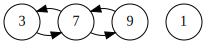

In [287]:
T1 = TournoiBinomial(1)
T2 = TournoiBinomial(3)
T3 = TournoiBinomial(7)
T4 = TournoiBinomial(9)
TT = TournoiBinomial.Union2Tid(T1,T2)
TTT = TournoiBinomial.Union2Tid(T3,T4)
TTTT = TournoiBinomial.Union2Tid(TT,TTT)

#Tmain2 = TournoiBinomial(2)
#T6 = TournoiBinomial(4)
#T7 = TournoiBinomial(6)
#T8 = TournoiBinomial(8)
#T9 = TournoiBinomial(10)

#F = FileBinomial()
#F.arbres.append(Tmain1,Tmain2)
#F.plot()

TTTT.plot()